### The puzzle:

Suppose	we	have	4	coins,	each	with	a	different	probability	of	throwing	Heads.	An unseen	hand	chooses	a	coin	at	random	and flips	it	50	times.	This	experiment	is done	several	times	with	the	resulting	sequences	as	shown	below	(H	=	Heads,	T	= Tails) Write	a	program	that	will	take	as	input	the	data	that	is	collected	from	this experiment	and	estimate	the	probability	of	heads for	each	coin.

Solution attempt using **K-Means**, **Agglomerative Hierarchical Clustering** and the **Expectation - Maximization Algorithm**:

1) First I load the data as found here: 
https://github.com/Costaspap/Data-science-mini-projects/blob/master/Workable%20Coin%20Toss%20Puzzle/data.txt

I split it by the newline character to separate the coin tosses and load them in a pandas series object.

In [284]:
import pandas as pd
import string as st
import matplotlib.pyplot as plt

with open('coins.txt', 'r') as myfile:
    data=myfile.read()
    
data_new = data.split('\n')
tosses = pd.Series(data_new)
tosses[0:5]

0    HHTTTHTTTTHHHTTHTTTTHTTTTTTTHTTTTHTTTHHTTHHTTT...
1    HTTTHHHHHHHHTTHTHTHHTTTHTHHTHTHHHTHTHHTTHTTTTH...
2    TTHHHHTTTHTTTTTTTTTHTTTTHTHHTHTTHHTTTHHTTTTTTT...
3    HHHHHHHTHHHTTHHTHHHTHHHHTHHHTHTTHHHHHHHHHHTTHH...
4    HHHHHHHHHTHHHHHHHHHTHHTHTHHTHHHHHTTHHTTHTHTHHH...
dtype: object

I will only keep the head 'H' occurences and find the relative frequency of occurence in each experiment:

In [285]:
heads = tosses.str.replace('T', '')
probs = heads.apply(lambda x: len(x)/50)
probs.sort_values(inplace = True)
probs[0:5]

59    0.14
12    0.18
65    0.20
80    0.20
31    0.20
dtype: float64

In [286]:
probs = probs.reshape(92,1)
probs.shape

C:\Users\k.papastamos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  #"""Entry point for launching an IPython kernel.


(92, 1)

### The EM Algorithm

In [287]:
from sklearn.mixture import GaussianMixture

em = GaussianMixture(n_components = 4, init_params = 'kmeans', max_iter = 1000, random_state = 600)
em.fit(probs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=600, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

By using the em algorithm, specifying the number of components, we end up with an array of clusters.

In [288]:
em.predict(probs) + 1

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [289]:
EM_results = pd.concat([pd.Series(em.predict(probs) + 1),pd.Series(probs.reshape(92,))],axis = 1)
EM_results.columns = ['Coins','Head_prob']
EM_results.iloc[0:5,:]

,Coins,Head_prob
0,4,0.14
1,4,0.18
2,4,0.20
3,4,0.20
4,4,0.20


By aggregating and calculating the mean probability per coin we get:

In [290]:
EM_Means = EM_results.groupby('Coins').Head_prob.agg(['mean']).sort_values(by = 'mean').reset_index(drop=True)
EM_Means

,mean
0,0.252174
1,0.355789
2,0.489333
3,0.800571


### K-Means Clustering

In [291]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init = 'random', random_state  = 200)
km.fit(probs)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=200, tol=0.0001, verbose=0)

In [292]:
km.predict(probs)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [293]:
KM_results = pd.concat([pd.Series(km.predict(probs) + 1),pd.Series(probs.reshape(92,))],axis = 1)
KM_results.columns = ['Coins','Head_prob']
KM_results.iloc[0:5,:]

,Coins,Head_prob
0,4,0.14
1,4,0.18
2,4,0.20
3,4,0.20
4,4,0.20


In [294]:
KM_Means = KM_results.groupby('Coins').Head_prob.agg(['mean']).sort_values(by = 'mean').reset_index(drop=True)
KM_Means

,mean
0,0.238889
1,0.347200
2,0.502667
3,0.805882


### Agglomerative Hierarchical Clustering

In [295]:
from sklearn.cluster import AgglomerativeClustering

Agg_C = AgglomerativeClustering(n_clusters = 4)
Agg_C.fit_predict(probs)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [296]:
Agg_C_results = pd.concat([pd.Series(Agg_C.fit_predict(probs) + 1),pd.Series(probs.reshape(92,))],axis = 1)
Agg_C_results.columns = ['Coins','Head_prob']
Agg_C_results.iloc[0:5,:]

,Coins,Head_prob
0,2,0.14
1,2,0.18
2,2,0.20
3,2,0.20
4,2,0.20


In [297]:
Agg_Means = Agg_C_results.groupby('Coins').Head_prob.agg(['mean']).sort_values(by = 'mean').reset_index(drop=True)
Agg_Means

,mean
0,0.257600
1,0.360000
2,0.497500
3,0.805882


### Conclusion

In [298]:
All = pd.concat([pd.Series(EM_Means['mean'].values).sort_values(),
           pd.Series(KM_Means['mean'].values).sort_values(),pd.Series(Agg_Means['mean'].values).sort_values()], axis = 1)
All.columns = ['EM','K-Means','Hierarchical']
All

,EM,K-Means,Hierarchical
0,0.252174,0.238889,0.257600
1,0.355789,0.347200,0.360000
2,0.489333,0.502667,0.497500
3,0.800571,0.805882,0.805882


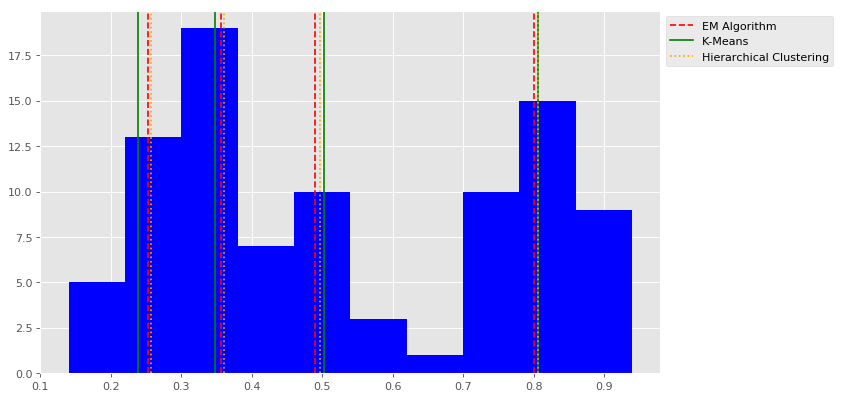

In [299]:
plt.figure(figsize=(10, 6), dpi=80)
plt.style.use('ggplot')

for line in All['EM']:
    plt.axvline(x = line, color = 'red', label = 'EM Algorithm', linestyle = '--')
    
for line in All['K-Means']:
    plt.axvline(x = line, color = 'green', label = 'K-Means')
    
for line in All['Hierarchical']:
    plt.axvline(x = line, color = 'orange', label = 'Hierarchical Clustering', linestyle = 'dotted')

plt.legend(bbox_to_anchor=(1, 1))
plt.hist(probs, color = 'blue')
plt.show()

The results show that the three algorithms approximately agree on the head probabilities for each coin.
So I conclude that the head probabilities are estimated to be ** 24%, 35%, 49% and 80%**.